In [19]:
import pathlib
import matplotlib.pyplot as  plt
import utils

import torch
from torch import nn
from dataloaders import load_cifar10
from trainer import Trainer

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
class ModelOne(nn.Module):
    def __init__(self,
                 image_channels,
                 num_classes):
        super().__init__()
        
        num_filters = 32

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(
                in_channels=image_channels,
                out_channels=num_filters,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2),
            nn.Conv2d(  # TODO
                in_channels=num_filters,
                out_channels=64,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2),
            nn.Conv2d(  # TODO
                in_channels=64,
                out_channels=128,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2)
        )

        self.num_output_features = 128*4*4

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.num_output_features, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes),
        )
        
    def forward(self, x):
        features = self.feature_extractor(x)
        classes = self.classifier(features)

        return classes

In [8]:

class ModelTwo(nn.Module):
    def __init__(self,
                 image_channels,
                 num_classes):
        super().__init__()
        
        num_filters = 256

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(
                in_channels=image_channels,
                out_channels=num_filters,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(  # TODO
                in_channels=num_filters,
                out_channels=num_filters,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2),
            nn.Conv2d(  # TODO
                in_channels=num_filters,
                out_channels=num_filters,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(  # TODO
                in_channels=num_filters,
                out_channels=num_filters*2,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            ),
            nn.Conv2d(  # TODO
                in_channels=num_filters*2,
                out_channels=num_filters*2,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(  # TODO
                in_channels=num_filters*2,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            )
        )

        self.num_output_features = 128*4*4

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.num_output_features, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes),
        )
        
    def forward(self, x):
        features = self.feature_extractor(x)
        classes = self.classifier(features)

        return classes

In [35]:

class ModelThree(nn.Module):
    def __init__(self,
                 image_channels,
                 num_classes):
        super().__init__()
        
        num_filters = 256

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(
                in_channels=image_channels,
                out_channels=num_filters,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.SiLU(),
            nn.Conv2d(  # TODO
                in_channels=num_filters,
                out_channels=num_filters,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.SiLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2),
            nn.Conv2d(  # TODO
                in_channels=num_filters,
                out_channels=num_filters,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.SiLU(),
            nn.Conv2d(  # TODO
                in_channels=num_filters,
                out_channels=num_filters*2,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.SiLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            ),
            nn.Conv2d(  # TODO
                in_channels=num_filters*2,
                out_channels=num_filters*2,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.SiLU(),
            nn.Conv2d(  # TODO
                in_channels=num_filters*2,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.SiLU(),
            nn.MaxPool2d(
                kernel_size=2,
                stride=2
            )
        )

        self.num_output_features = 128*4*4

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.num_output_features, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes),
        )
        
    def forward(self, x):
        features = self.feature_extractor(x)
        classes = self.classifier(features)

        return classes

In [4]:
# Train the first model
epochs = 100
batch_size = 64
learning_rate = 5e-3
early_stop_count = 4
dataloadersOne = load_cifar10(batch_size)
modelOne = ModelOne(image_channels=3, num_classes=10)
trainerOne = Trainer(
        batch_size,
        learning_rate,
        early_stop_count,
        epochs,
        modelOne,
        dataloadersOne
    )
trainerOne.train()

Files already downloaded and verified
Files already downloaded and verified
ModelOne(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)
Epoch: 0, Batches per seconds: 151.23, Global step:    351, Validation Loss: 1.39, Validation Accuracy: 0.503
Epoch: 0, Batches per seco

In [9]:
# Train the second model
epochs = 100
batch_size = 64
learning_rate = 5e-3
early_stop_count = 8
dataloadersTwo = load_cifar10(batch_size)
modelTwo = ModelTwo(image_channels=3, num_classes=10)
trainerTwo = Trainer(
        batch_size,
        learning_rate,
        early_stop_count,
        epochs,
        modelTwo,
        dataloadersTwo
    )
trainerTwo.train()

Files already downloaded and verified
Files already downloaded and verified
ModelTwo(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(512, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_

In [36]:
# Train the third model
epochs = 100
batch_size = 64
learning_rate = 5e-3
early_stop_count = 8
dataloadersThree = load_cifar10(batch_size)
modelThree = ModelThree(image_channels=3, num_classes=10)
trainerThree = Trainer(
        batch_size,
        learning_rate,
        early_stop_count,
        epochs,
        modelThree,
        dataloadersThree
    )
trainerThree.train()

Files already downloaded and verified
Files already downloaded and verified
ModelThree(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): SiLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): SiLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): SiLU()
    (7): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): SiLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): SiLU()
    (12): Conv2d(512, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): SiLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, en

In [20]:
def compare_NN(
        trainers,
        names,
    ):
    fig, (ax1, ax2) = plt.subplots(1,2)

    for (trainer, name) in zip(trainers, names):
        utils.plot_loss_ax(trainer.train_history["loss"], label="Training loss"+name, npoints_to_average=1, ax=ax1)
        utils.plot_loss_ax(trainer.validation_history["loss"], label="Validation loss"+name, npoints_to_average=1, ax=ax1)

    for (trainer, name) in zip(trainers, names):
        utils.plot_loss_ax(trainer.validation_history["accuracy"], label="Validation accuracy"+name, npoints_to_average=1, ax=ax2)
    
    ax1.legend()
    ax2.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'plots/task3.png'

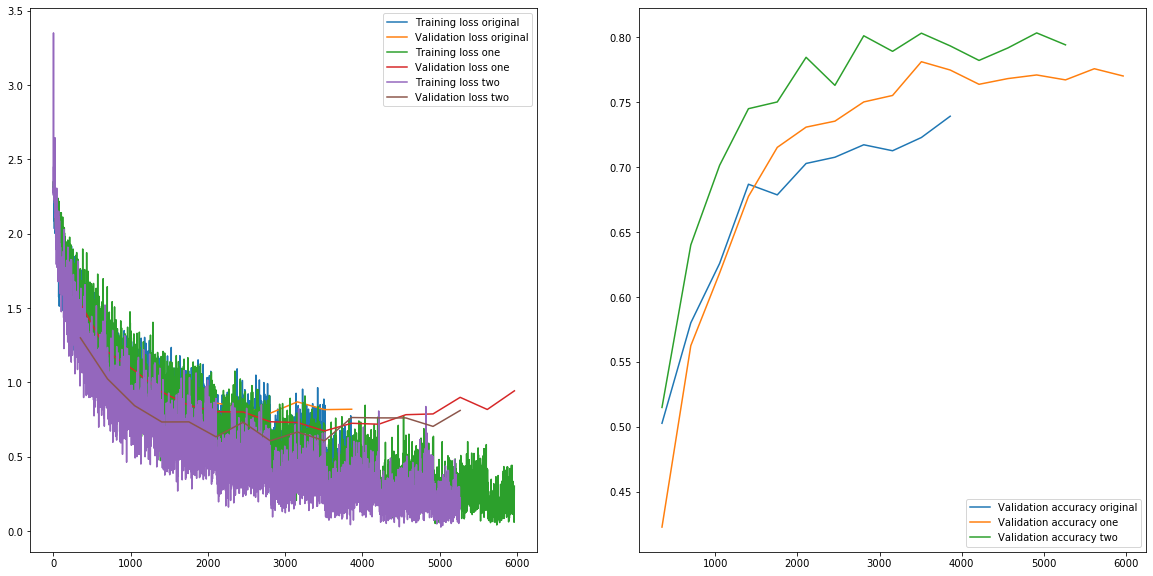

In [39]:
compare_NN([trainerOne, trainerTwo, trainerThree], [" original", " one", " two"])
plt.savefig("task3.png")
plt.show()